In [4]:
from sklearn.datasets import load_breast_cancer
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
X_train, X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.958
Test set score: 0.958


as training and test set performance are very close, it is likely that we are underfitting (C=1). Let's try to increase C to fit a more flexible model:

In [5]:
logreg100 = LogisticRegression(C=100,max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

Training set score: 0.984
Test set score: 0.965


using C=100 results in higher training set accuracy, and also a slightly increased test set accuracy, confirming our intution that a more complex model should perform better. 
We can also investigate what happens if we use an even more regularized model that the default of C=1, by setting C=0.01

In [8]:
logreg001 = LogisticRegression(C=0.001,max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test,y_test)))

Training set score: 0.953
Test set score: 0.944


as expected, an already underfit model, both training and test set accuracy decrease relative to the default parameters.

In [9]:
import matplotlib.pyplot as plt

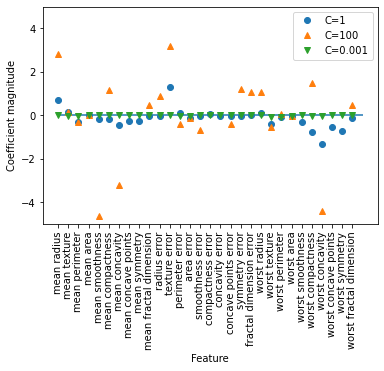

In [10]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

if we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features. Here is the coefficient plot and classification accuracies for L1 regularization.